## Q1: Linear Regression (Regression Task)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### (a) Dataset Selection (California Housing dataset)

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### (b) Preprocessing

In [3]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
df.dropna(inplace=True)
df.shape

(20433, 10)

In [5]:
df = pd.get_dummies(df,columns=['ocean_proximity'])

In [6]:
X = df.drop('median_house_value',axis = 1)
y = df['median_house_value']

### (c) Model Training

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
model = LinearRegression()
model.fit(X_train_scaled,y_train)
print(f"Regression Coefficients : {model.coef_}\n")
print(f"Regression Intercepts : {model.intercept_:.2f}")

Regression Coefficients : [-54375.70649682 -54808.036235    13600.08831297 -13613.10262855
  42999.85290993 -41119.06758656  16307.3411779   74538.73815516
   6398.33126633 -12248.06659106   3068.68309885   2102.83573461
   5385.4470736 ]

Regression Intercepts : 206644.40


In [10]:
y_pred = model.predict(X_test_scaled)

### (d) Evaluating the model

In [11]:
print(f"Targeted Value for test data : {y_pred}")

Targeted Value for test data : [201882.95986765 147279.68214385 207796.60979847 ... 110229.93045317
 137315.7328207  169083.81714047]


In [12]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

MSE: 4802173538.60
R2 Score: 0.65


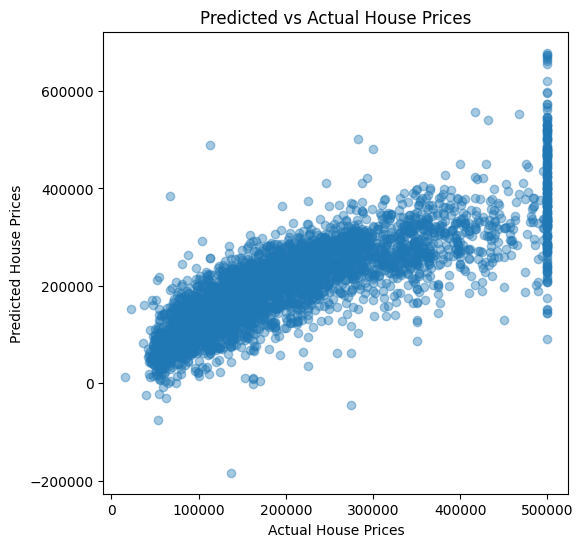

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Predicted vs Actual House Prices")

plt.show()